<a href="https://colab.research.google.com/github/soumya-1313/Scikit_learn/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Random Forest***
1.  bagging->booststrap aggregration
2. feature selection in random forest
3. **Bagging**->from main sample creating samll datasets with some columns and creating decision tree
4. **Aggregation**->sample to feed in bagged decision trees
5. ***Advantages***->low variance,reduce overfitting,no need for normalization,**high accuracy**,scalability,versatility(CART),handles missing data
6. ***Disadvanatges***-> Complexity harder to interpret,computational expensive,baised towards features with many levels,Black Box model(diificult to handle),imbalanced data

In [24]:
import pandas as pd
df=pd.read_csv('car.data')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
df.columns=col_names
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [28]:
df.describe(include='all').T

,count,unique,top,freq
buying,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
lug_boot,1727,3,med,576
safety,1727,3,med,576
class,1727,4,unacc,1209


In [29]:
for col in col_names:
  print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [30]:
df[df.duplicated()]

,buying,maint,doors,persons,lug_boot,safety,class


In [31]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

df['buying']=oe.fit_transform(df[['buying']])
df['maint']=oe.fit_transform(df[['maint']])
df['doors']=oe.fit_transform(df[['doors']])
df['persons']=oe.fit_transform(df[['persons']])
df['lug_boot']=oe.fit_transform(df[['lug_boot']])
df['safety']=oe.fit_transform(df[['safety']])
df['class']=oe.fit_transform(df[['class']])

In [32]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,2.0,2.0
1,3.0,3.0,0.0,0.0,2.0,0.0,2.0
2,3.0,3.0,0.0,0.0,1.0,1.0,2.0
3,3.0,3.0,0.0,0.0,1.0,2.0,2.0
4,3.0,3.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...
1722,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1723,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1724,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1725,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [33]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
pred1=rf.predict(x_test)
pred1

array([2., 2., 2., 0., 2., 0., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 2., 0., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 1.,
       2., 2., 1., 2., 2., 3., 0., 0., 2., 2., 1., 0., 2., 2., 2., 2., 2.,
       2., 0., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 3., 2., 2.,
       1., 2., 3., 0., 2., 2., 2., 0., 2., 2., 2., 2., 3., 2., 2., 0., 2.,
       0., 2., 2., 0., 0., 2., 1., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2.,
       2., 2., 2., 1., 2., 2., 2., 0., 2., 0., 2., 2., 0., 2., 2., 2., 2.,
       2., 2., 0., 2., 0., 0., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 0., 2., 0., 2., 0., 2., 2., 2., 2., 0., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 3., 2., 3., 0., 0., 2., 3.,
       0., 2., 3., 2., 0., 0., 3., 2., 0., 2., 0., 2., 2., 0., 1., 2., 2.,
       2., 2., 2., 2., 0., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 3.,
       2., 0., 2., 0., 2., 3., 2., 2., 0., 2., 2., 2., 2., 2., 2., 3., 3.,
       2., 2., 0., 3., 0.

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred1)

0.9672447013487476

# ***Hyperparameters***

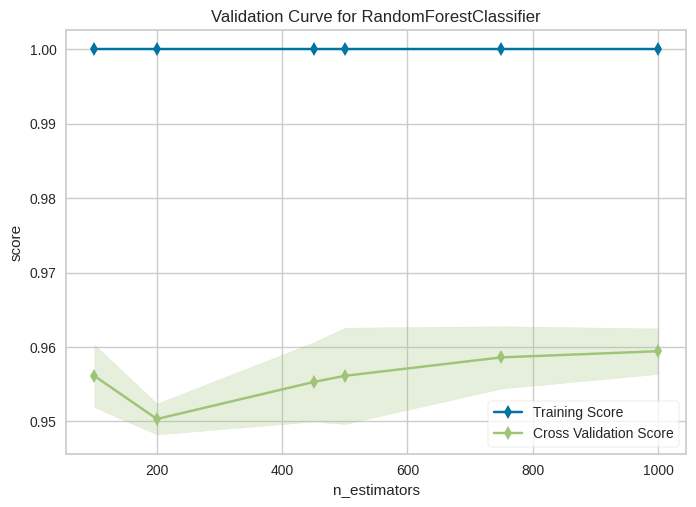

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  200,  450,  500,  750, 1000]),
                scoring='accuracy')


In [40]:
from yellowbrick.model_selection import validation_curve
num_est=[100,200,450,500,750,1000]
print(validation_curve(RandomForestClassifier(),X=x_train,y=y_train,param_name='n_estimators',param_range=num_est,scoring='accuracy',cv=3))

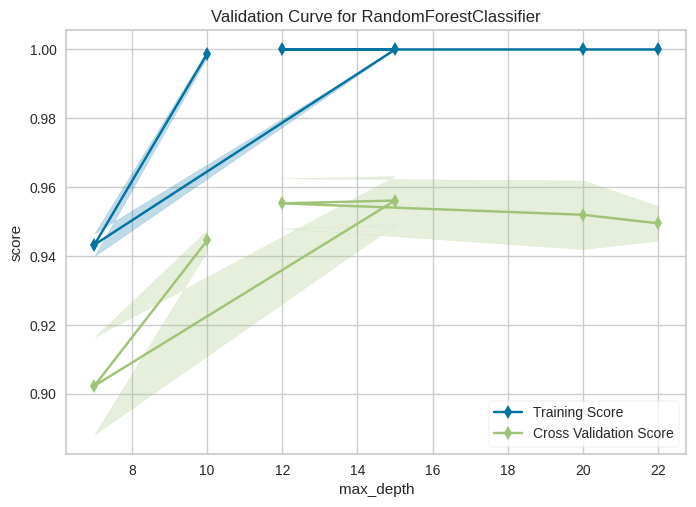

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_depth',
                param_range=array([10,  7, 15, 12, 20, 22]),
                scoring='accuracy')


In [41]:
from yellowbrick.model_selection import validation_curve
depth_vals=[10,7,15,12,20,22]
print(validation_curve(RandomForestClassifier(),X=x_train,y=y_train,param_name='max_depth',param_range=depth_vals,scoring='accuracy',cv=3))

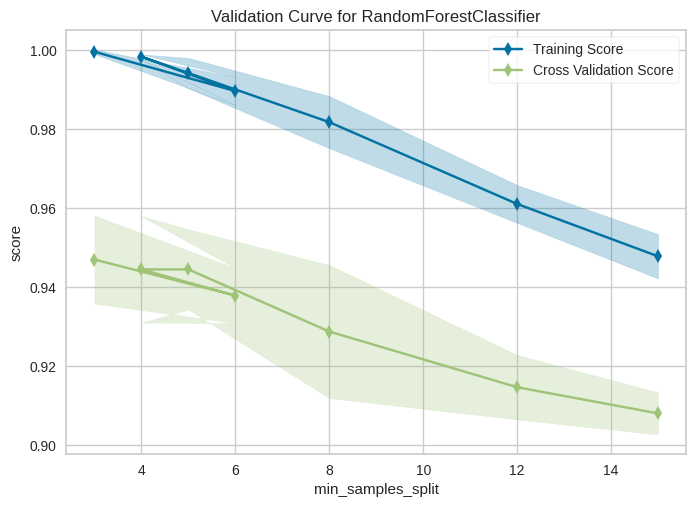

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 3,  6,  4,  5,  8, 12, 15]),
                scoring='accuracy')


In [42]:
min_samples=[3,6,4,5,8,12,15]
print(validation_curve(RandomForestClassifier(),X=x_train,y=y_train,param_name='min_samples_split',param_range=min_samples,scoring='accuracy',cv=3))

In [43]:
clf=RandomForestClassifier(n_estimators=100,max_depth=15,min_samples_split=3,random_state=0)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_split=3, random_state=0)

In [44]:
pred2=clf.predict(x_test)
print(accuracy_score(y_test,pred2))

0.9653179190751445


In [45]:
feature_scores=pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
print(feature_scores)

safety      0.278065
persons     0.224531
buying      0.193195
maint       0.157157
lug_boot    0.083287
doors       0.063765
dtype: float64


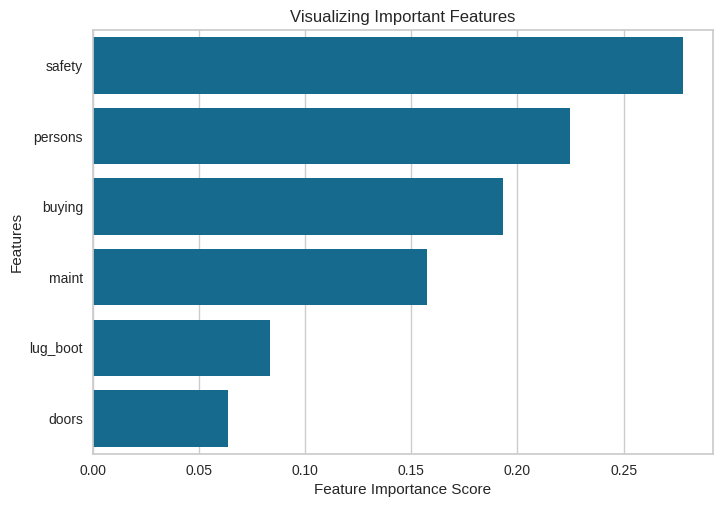

In [46]:
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [48]:
clf2=RandomForestClassifier(n_estimators=100,max_depth=15,min_samples_split=3,random_state=0)
xn=df.drop(['doors','lug_boot','maint'],axis=1)
yn=df['class']
x_trainn,x_testt,y_trainn,y_testt=train_test_split(xn,yn,test_size=0.3,random_state=42)
clf2.fit(x_trainn,y_trainn)

RandomForestClassifier(max_depth=15, min_samples_split=3, random_state=0)

In [49]:
pred3=clf2.predict(x_testt)
print(accuracy_score(y_testt,pred3))

1.0
